In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('gene_expression.csv')

In [5]:
dataset.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [7]:

X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler

# Créer et ajuster le StandardScaler sur les données d'entraînement
scaler = StandardScaler().fit(X_train)

# Appliquer la normalisation aux données d'entraînement et de test
normalized_x_train = scaler.transform(X_train)
normalized_x_test = scaler.transform(X_test)

In [11]:
print('x train before Normalization')
print(X_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

#standerizing data
from sklearn.preprocessing import StandardScaler
standScaler=StandardScaler()

x train before Normalization
[[5.2 6.9]
 [5.4 8.2]
 [5.1 3.7]
 [3.8 5.4]
 [4.  8.2]]

x train after Normalization
[[-0.21298231  0.86027165]
 [-0.10270021  1.61185307]
 [-0.26812336 -0.98977491]
 [-0.98495703 -0.00693767]
 [-0.87467493  1.61185307]]


### Making Classification using KNN

In [12]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(normalized_x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(normalized_x_test)

In [13]:
#Evaluating predictions
cm = confusion_matrix(y_test, y_pred)
cm

array([[277,  21],
       [ 28, 274]])

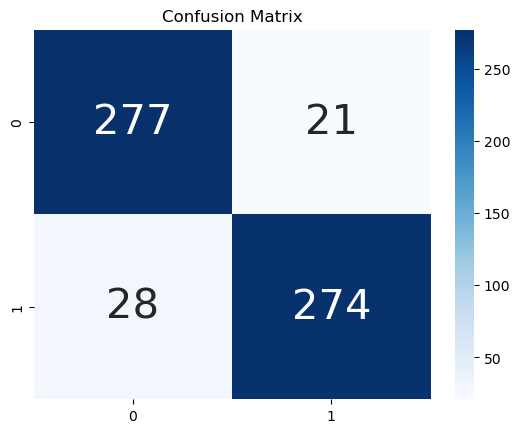

In [14]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9183333333333333


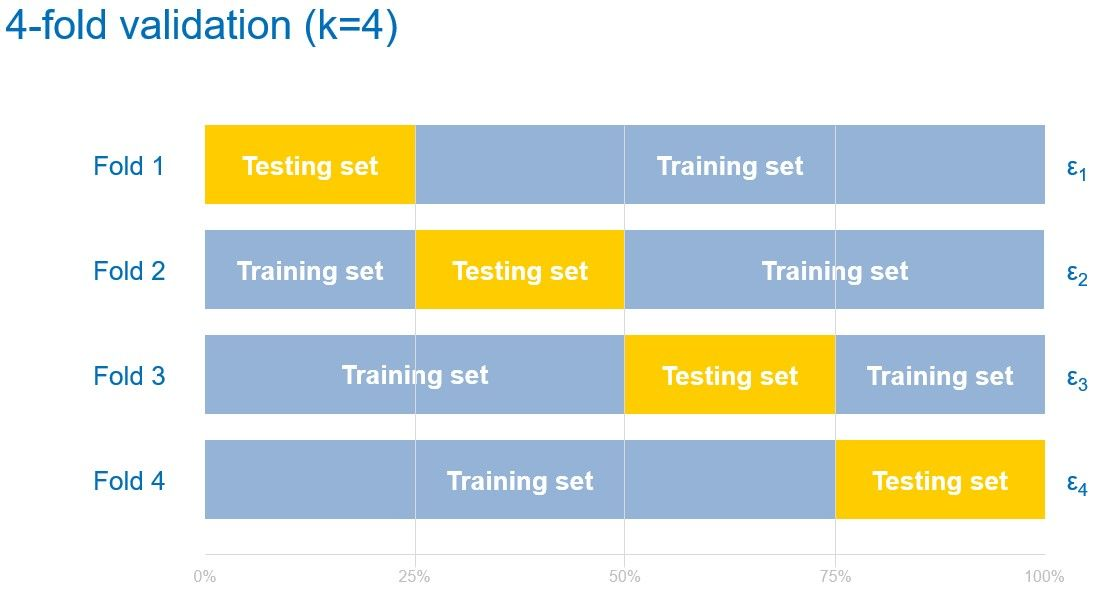

In [16]:

#Using cross-validation for parameter tuning
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, normalized_x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
#from scipy import stats
#stats.mode(a, keepdims=True)

C:\Users\bouch\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bouch\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bouch\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bouch\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

<Figure size 640x480 with 0 Axes>

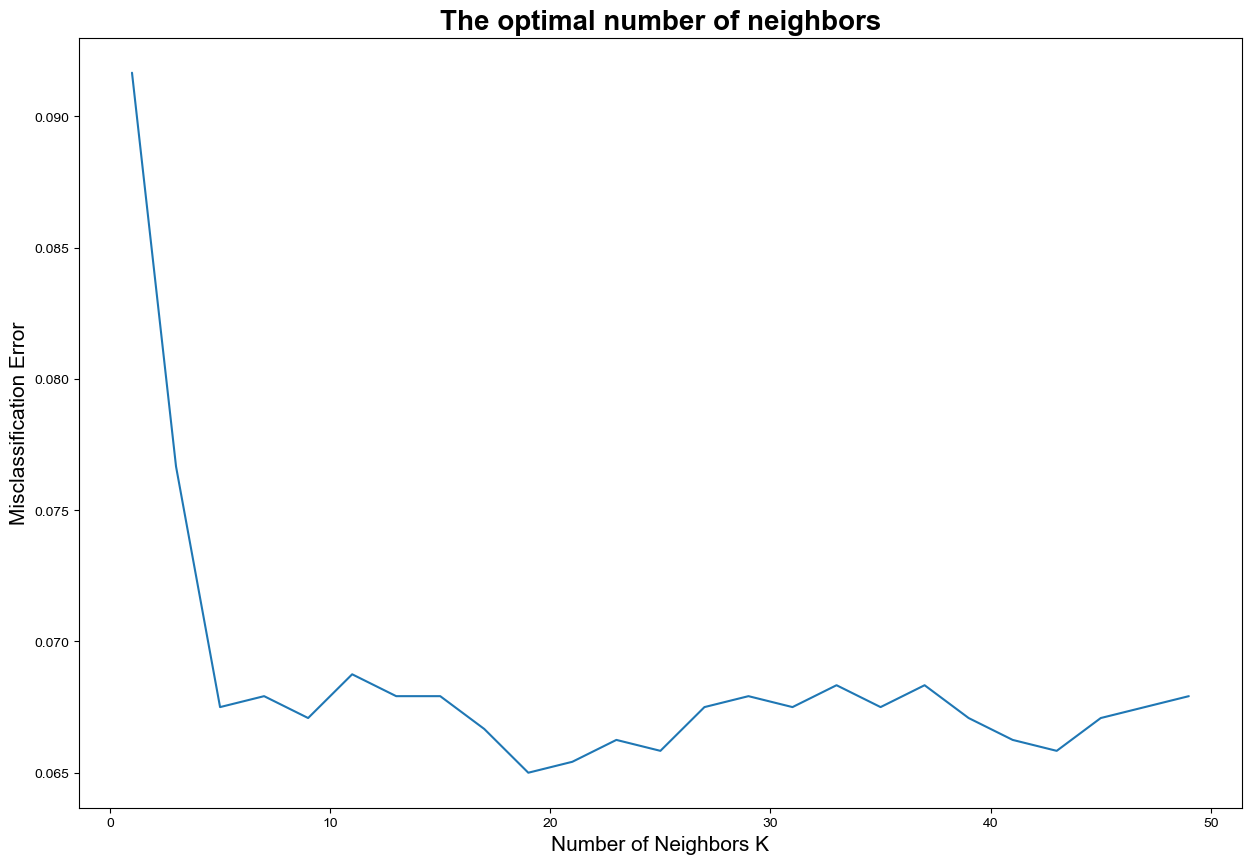

In [17]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [18]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 19.
